# [Towards Deep Learning Models Resistant to Adversarial Attacks<br />对可抵御对抗攻击的深度学习模型的研究](http://arxiv.org/abs/1706.06083)

How can we train deep neural networks that are robust to adversarial inputs?  
如何训练对对抗样本具有鲁棒性的深度神经网络？

In this paper, we study the adversarial robustness of neural networks through the lens of **robust optimization**.  
这篇论文从**鲁棒优化**的角度研究了神经网络的对抗鲁棒性。

We use a natural **saddle point (min-max) formulation** to capture the notion of security against adversarial attacks in a principled manner.  
我们使用自然的**鞍点公式**来捕捉对抗攻击安全性的概念。

- We conduct a careful experimental study of the optimization landscape corresponding to this saddle point formulation. In particular, we provide strong evidence that first-order methods can reliably solve this problem. We supplement these insights with ideas from real analysis to further motivate **projected gradient descent (PGD)** as **a universal “first-order adversary”**, i.e., the strongest attack utilizing the local first order information about the network.<br />我们对鞍点公式对应的优化空间进行了仔细的实验研究。特别地，我们提供了强有力的证据表明一阶方法可以可靠地解决这个问题。我们从实分析的角度补充这些见解，进一步使得**投射梯度下降法**（**PGD**）成为 **"一种通用的一阶对抗"**，即利用网络的局部一阶信息进行的最强攻击。
- To reliably withstand strong adversarial attacks, networks require **a larger capacity** than for correctly classifying benign examples only. This shows that a robust decision boundary of the saddle point problem can be significantly **more complicated** than a decision boundary that simply separates the benign data points.<br />为了可靠地抵御强大的对抗攻击，网络需要比仅正确分类良性样本**更大的容量**。这表明，鞍点问题的稳健决策边界可能比简单分离良性数据点的**决策边界复杂得多**。
- Building on the above insights, we train networks on MNIST and CIFAR10 that are robust to a wide range of adversarial attacks. Our best MNIST model achieves an accuracy of more than 89% against the strongest adversaries in our test suite. **In particular, our MNIST network is even robust against white box attacks of an iterative adversary.** Our CIFAR10 model achieves an accuracy of 46% against the same adversary. Furthermore, in case of **the weaker black box/transfer attacks**, our MNIST and CIFAR10 networks achieve the accuracy of more than 95% and 64%, respectively. To the best of our knowledge, we are the first to achieve these levels of robustness on MNIST and CIFAR10 against such a broad set of attacks.<br />基于上述见解，我们在 MNIST 和 CIFAR10 上训练了网络，这些网络对各种对抗攻击具有鲁棒性。我们的最佳 MNIST 模型面对测试组中最强的对手时，准确率超过 89%。**特别是，我们的 MNIST 网络甚至可以抵御迭代的白盒攻击。**我们的 CIFAR10 模型在面对相同对手时的准确率为 46%。此外，在**较弱的黑盒/转移攻击**的情况下，我们的 MNIST 和 CIFAR10 网络的准确率分别达到 95% 和 64% 以上。据我们所知，我们是第一个在 MNIST 和 CIFAR10 上针对如此广泛的攻击实现如此高水平鲁棒性。




## An Optimization View on Adversarial Robustness<br />基于对抗鲁棒性的优化视角

Let us consider a standard classification task with an underlying data distribution $\mathfrak{D}$ over pairs of examples $x ∈ \mathbb{R}^{d}$ and corresponding labels $y ∈ [k]$. We also assume that we are given a suitable loss function $L(θ, x, y)$, for instance the cross-entropy loss for a neural network. As usual, $θ ∈ \mathbb{R}^{p}$ is the set of model parameters. Our goal then is to find model parameters $θ$ that minimize the risk $E_{(x,y)∼\mathfrak{D}}[L(x, y, θ)]$.  
考虑一个标准的分类任务，其中有一个基础数据分布 $\mathfrak{D}$， 它包含样本 $x ∈ \mathbb{R}^{d}$ 和相应的标签 $y ∈ [k]$ 。我们还假设我们有一个合适的损失函数 $L(θ, x, y)$，例如神经网络的交叉熵损失。通常，$θ ∈ \mathbb{R}^{p}$ 是模型参数的集合。我们的目标是找到最小化风险 $E_{(x,y)∼\mathfrak{D}}[L(x, y, θ)]$ 的模型参数 $θ$。

In order to reliably train models that are robust to adversarial attacks, it is necessary to augment the ERM paradigm appropriately. Instead of resorting to methods that directly focus on improving the robustness to specific attacks, our approach is to first propose **a concrete guarantee that an adversarially robust model should satisfy**. We then **adapt our training methods** towards achieving this guarantee.  
为了可靠地训练对对抗攻击具有鲁棒性的模型，有必要适当地增强 ERM 范式。我们的方法不是采用直接专注于提高对特定攻击的鲁棒性的方法，而是首先提出**一个具体的对抗鲁棒模型应该满足的保证**。然后我们**调整我们的训练方法**以实现这个保证。

The first step towards such a guarantee is to specify an attack model, i.e., a precise definition of the attacks our models should be resistant to. For each data point $x$, we introduce **a set of allowed perturbations** $S ⊆ \mathbb{R}_{d}$ that formalizes the manipulative power of the adversary. In image classification, we choose $S$ so that it captures perceptual similarity between images. While we focus on robustness against $l_{∞}$-bounded attacks in this paper, we remark that more comprehensive notions of **perceptual similarity** are an important direction for future research.  
为了实现这种保证，第一步是指定攻击模型，即我们的模型应该抵御的攻击的精确定义。对于每个数据点 $x$，我们引入**一组允许的扰动** $S ⊆ \mathbb{R}_{d}$，它形式化了对手的操纵能力。在图像分类中，我们选择 $S$ 以捕捉图像之间的感知相似性。虽然我们在本文中专注于对 $l_{∞}$-有界攻击的鲁棒性，但我们指出，更全面的**感知相似性**概念是未来研究的一个重要方向。

Next, we modify the definition of population risk ED[L] by incorporating the above adversary. Instead of feeding samples from the distribution D directly into the loss L, we allow the adversary to perturb the input first. This gives rise to the following saddle point problem, which is our central object of study:  
然后，我们通过结合上述对攻击的定义，来修改总体风险 $E_{\mathfrak{D}}[L]$ 的定义。我们允许攻击首先扰动输入，而不是直接将分布 $\mathfrak{D}$ 中的样本输入损失 $L$。这产生了以下鞍点问题，这是我们研究的中心对象：
$$
\min_{θ} \ ρ(θ), \rm{where} \  ρ(θ) = E_{(x,y)∼\mathfrak{D}} [ \max_{δ∈S} \ L(θ, x + δ, y) ] .
$$  

First, this formulation gives us a unifying perspective that encompasses much prior work on adversarial robustness. Our perspective stems from viewing the saddle point problem as the composition of **an inner maximization problem** and **an outer minimization problem**. Both of these problems have a natural interpretation in our context. **The inner maximization problem** aims to find an adversarial version of a given data point $x$ that achieves a high loss. This is precisely the problem of attacking a given neural network. On the other hand, the goal of **the outer minimization problem** is to find model parameters so that **the “adversarial loss”** given by the inner attack problem is minimized. **This is precisely the problem of training a robust classifier using adversarial training techniques.**  
首先，这个公式给了我们一个统一的视角，它包含了对抗鲁棒性的许多先前的工作。我们的观点源于将鞍点问题视为**内部最大化问题**和**外部最小化问题**的组合。这两个问题在我们的背景下都有一个自然的解释。**内部最大化问题**的目标是找到给定数据点 $x$ 的对抗版本，使得损失最大。这正是攻击给定神经网络的问题。另一方面，**外部最小化问题**的目标是找到模型参数，使得内部攻击问题给出的“**对抗损失**”最小化。**这正是使用对抗训练技术训练鲁棒分类器的问题。**

Second, the saddle point problem specifies a clear goal that an ideal robust classifier should achieve, as well as a quantitative measure of its robustness. In particular, when the parameters $θ$ yield a (nearly) **vanishing risk**, the corresponding model is perfectly robust to attacks specified by our attack model.  
其次，鞍点问题指定了一个理想的鲁棒分类器应该达到的明确目标、一个定量度量它的鲁棒性的方法。特别是，当参数 $θ$ 产生一个（几乎）**消失的风险**时，相应的模型对我们的攻击模型指定的攻击是完全鲁棒的。

### A Unified View on Attacks and Defenses<br />攻击与防御的统一视角

Prior work on adversarial examples has focused on two main questions:  
1. How can we produce strong adversarial examples, i.e., adversarial examples that fool a model with high confidence while requiring only a small perturbation?  
2. How can we train a model so that there are no adversarial examples, or at least so that an adversary cannot find them easily?  

之前关于对抗样本的研究主要集中在两个问题上：
1. 我们如何产生强大的对抗样本，即高置信度地欺骗模型的对抗样本，同时只需要很小的扰动？  
2. 我们如何训练一个模型，使得没有对抗样本，或者至少使得一种对抗攻击不能轻易地找到它们？

Our perspective on the saddle point problem gives answers to both these questions. On the attack side, prior work has proposed methods such as the Fast Gradient Sign Method (FGSM) and multiple variations of it. FGSM is an attack for an $l_{∞}$-bounded adversary and computes an adversarial example as  
我们基于鞍点问题的观点给出了这两个问题的答案。在攻击方面，之前的工作提出了诸如快速梯度符号法（FGSM）和它的多种变体的方法。FGSM 是一种针对 $l_{∞}$-有界的攻击，它这样计算一个对抗样本：
$$
x_{adv} = x + \epsilon \ \rm{sign}(\nabla_{x} L(θ, x, y)) .
$$

One can interpret this attack as a simple one-step scheme for maximizing the inner part of the saddle point formulation. A more powerful adversary is the multi-step variant, which is essentially projected gradient descent (PGD) on the negative loss function  
我们可以把这种攻击理解为一种简单的单步方案，用于最大化鞍点公式的内部部分。更强大的对手是多步变体，其本质是负损失函数上的投影梯度下降（PGD）
$$
x_{adv}^{(t+1)} = \Pi_{x+S} \left( x_{adv}^{(t)} + \alpha \ \rm{sign}(\nabla_{x} L(θ, x_{adv}^{(t)}, y)) \right) .
$$

On the defense side, the training dataset is often augmented with adversarial examples produced by FGSM.  
在防御方面，训练数据集通常会用 FGSM 产生的对抗样本进行增强。

## Towards Universally Robust Networks<br />对普遍鲁棒网络的研究

Current work on adversarial examples usually focuses on specific defensive mechanisms, or on attacks against such defenses. An important feature of PGD formulation is that attaining small adversarial loss gives a guarantee that **no allowed attack will fool the network**. By definition, no adversarial perturbations are possible because **the loss is small for all perturbations allowed by our attack model**. Hence, we now focus our attention on obtaining a good solution to the formulation.  
目前关于对抗样本的工作通常集中在特定的防御机制上，或者针对这些防御的攻击上。PGD 公式的一个重要特征是，获得小的对抗损失可以保证**没有允许的攻击会欺骗网络**。根据定义，没有对抗性的扰动是可能奏效的，因为**对于我们的攻击模型允许的所有扰动，损失都很小**。因此，我们现在把注意力集中在获得PGD公式的一个好的解上。

Unfortunately, while the overall guarantee provided by the saddle point problem is evidently useful, it is not clear whether we can actually find a good solution in reasonable time. Solving the saddle point problem involves tackling both a non-convex outer minimization problem and a non-concave inner maximization problem. One of our key contributions is demonstrating that, in practice, **one can solve the saddle point problem after all**. In particular, we now discuss **an experimental exploration of the structure given by the non-concave inner problem**. We argue that **the loss landscape corresponding to this problem has a surprisingly tractable structure of local maxima**. This structure also points towards **projected gradient descent as the “ultimate” first-order adversary**. Sections 4 and 5 then show that the resulting trained networks are indeed robust against a wide range of attacks, **provided the networks are sufficiently large**.  
不幸的是，虽然鞍点问题提供的整体保证显然是有用的，但我们不清楚我们是否能在合理的时间内找到一个好的解。解决鞍点问题涉及到解决一个非凸的外部最小化问题和一个非凹的内部最大化问题。我们的一个关键贡献是证明，在实践中，**我们终究可以解决鞍点问题**。特别是，我们现在讨论**非凹内部问题给出的结构的实验探索**。我们认为，**对应于这个问题的损失函数的格局具有令人惊讶的易处理的局部最大值结构**。这种结构也指向了**投影梯度下降法作为“终极”一阶对抗攻击**。第 4 和第 5 节表明，由此产生的训练网络确实对各种攻击具有鲁棒性，**只要网络足够大**。

### The Landscape of Adversarial Examples<br />对抗样本的格局

To understand the inner problem in more detail, we investigate the landscape of local maxima for multiple models on MNIST and CIFAR10. In order to explore a large part of the loss landscape, we re-start PGD from many points in the $l_{∞}$ balls around data points from the respective evaluation sets.  
为了更详细地了解内部的优化问题，我们研究了 MNIST 和 CIFAR10 上多个模型的局部最大值格局。为了探索损失函数的大部分空间，我们从各自评估集中的数据点周围的 $l_{∞}$ 球中的许多点重新启动 PGD。

Surprisingly, our experiments show that the inner problem is tractable after all, at least from the perspective of first-order methods. While there are many local maxima spread widely apart within $x_{i} + S$, they tend to have very well-concentrated loss values.  
令人惊讶的是，我们的实验表明，内部问题终究是易处理的，至少从一阶方法的角度来看。虽然在 $x_{i} + S$ 中有许多局部最大值，但它们往往具有非常集中的损失值。

Specifically, in our experiments we found the following phenomena:  
具体来说，在我们的实验中，我们发现了以下现象：
- We observe that the loss achieved by the adversary increases in a fairly consistent way and **plateaus** rapidly when performing projected $l_{∞}$ gradient descent for randomly chosen starting points inside $x + S$.  
我们观察到，当在 $x + S$ 内随机选择起始点进行 $l_{∞}$ PGD时，对抗攻击所达到的损失以相当一致的方式增加，并迅速达到**平稳**状态。
- Investigating the concentration of maxima further, we observe that over a large number of random restarts, the loss of the final iterate follows **a well-concentrated distribution** without extreme outliers.  
进一步研究最大值的集中度，我们观察到，在大量的随机重启中，最终迭代的损失遵循一个**集中度很好的分布**，没有极端的离群值。
- To demonstrate that maxima are noticeably distinct, we also measured the $l_{2}$ distance and angles between all pairs of them and observed that distances are distributed close to the expected distance between two random points in the $l_{∞}$ ball, and angles are close to 90◦. Along the line segment between local maxima, the loss is convex, attaining its maximum at the endpoints and is reduced by a constant factor in the middle. Nevertheless, for the entire segment, the loss is considerably higher than that of a random point.  
为了证明最大值明显不同，我们还测量了它们之间的所有对的 $l_{2}$ 距离和角度，并观察到距离分布接近于 $l_{∞}$ 球中两个随机点之间的预期距离，角度接近于 90◦。在局部最大值之间的线段上，损失是凸的，在端点处达到最大值，在中间以恒定系数减少。然而，对于整个线段，损失要比随机点的损失高得多。
- Finally, we observe that the distribution of maxima suggests that the recently developed subspace view of adversarial examples is not fully capturing the richness of attacks. In particular, we observe adversarial perturbations with negative inner product with the gradient of the example, and deteriorating overall correlation with the gradient direction as the scale of perturbation increases.  
最后，我们观察到，最大值的分布表明，最近发展起来的对抗样本的子空间视图并没有完全捕捉到攻击的丰富性。特别是，我们观察到，对抗性扰动与示例的梯度具有负内积，并且随着扰动的规模增加，与梯度方向的整体相关性恶化。

All of this evidence points towards PGD being a “universal” adversary among first-order approaches, as we will see next.  
所有这些证据都表明，PGD 是一种“通用”的一阶对抗方法，我们将在下一节中看到。

### First-Order Adversaries<br />一阶对抗

If we train the network to be robust against PGD adversaries, it will be robust against a wide range of attacks that encompasses all current approaches.  
如果我们训练网络对 PGD 对手具有鲁棒性，它将对包含所有当前方法的广泛攻击具有鲁棒性。

### Descent Directions for Adversarial Training<br />对抗训练的下降方向

A natural way of computing the gradient of the outer problem, $∇_{θ}ρ(θ)$, is computing the gradient of the loss function at a maximizer of the inner problem. This corresponds to replacing the input points by their corresponding adversarial perturbations and normally training the network on the perturbed input.  
计算外部问题的梯度 $∇_{θ}ρ(θ)$ 的一种自然方法是计算内部问题最大化器处的损失函数的梯度。这相当于用相应的对抗样本替换输入点，并在扰动的输入上正常训练网络。




## Network Capacity and Adversarial Robustness<br />网络容量与对抗鲁棒性

At a high level, classifying examples in a robust way requires a stronger classifier, since the presence of adversarial examples changes the decision boundary of the problem to a more complicated one.  
从高层次上讲，以鲁棒的方式对示例进行分类需要一个更强的分类器，因为对抗样本的存在将问题的决策边界改变为一个更复杂的决策边界。

**Weak models may fail to learn non-trivial classifiers.** The small capacity of the network forces the training procedure to sacrifice performance on natural examples in order to provide any kind of robustness against adversarial inputs.  
**弱模型可能无法学习非平凡的分类器。**网络的小容量迫使训练过程牺牲自然样本的性能，以提供任何对抗输入的鲁棒性。

**The value of the saddle point problem decreases as we increase the capacity.** Fixing an adversary model, and training against it, the value of (2.1) drops as capacity increases, indicating the the model can fit the adversarial examples increasingly well.  
**随着容量的增加，鞍点问题的值减小。**固定一个对手模型，并针对它进行训练，$\rho (\theta)$的值随着容量的增加而下降，表明模型可以越来越好地拟合对抗样本。

**Capacity alone helps.** We observe that increasing the capacity of the network when training using only natural examples (apart from increasing accuracy on these examples) increases the robustness against one-step perturbations. This effect is greater when considering adversarial examples with smaller $ε$.  
**增加容量是有帮助的。**我们观察到，当仅使用自然样本进行训练时，增加网络的容量（除了增加这些样本的准确性之外）会增加对一步扰动的鲁棒性。当考虑到更小$\epsilon$对抗样本时，这种效果更大。

**More capacity and stronger adversaries decrease transferability**. We validate this experimentally by observing that the correlation between gradients from the source and the transfer network, becomes less significant as capacity increases.  
**更大的容量和更强的对手会降低可转移性。**我们通过观察源网络和转移网络之间的梯度之间的相关性随着容量的增加而变得不那么显著来验证这一点。

**FGSM adversaries don’t increase robustness (for large $\epsilon$)**. When training the network using adversarial examples generated with the FGSM, we observe that the network overfits to these adversarial examples. This behavior is known as *label leaking* and stems from the fact that the adversary produces a very restricted set of adversarial examples that the network can overfit to. These networks have poor performance on natural examples and don’t exhibit any kind of robustness against PGD adversaries. For the case of smaller $\epsilon$ the loss is often linear enough in the $l_{∞}$-ball around natural examples, that FGSM finds adversarial examples close to those found by PGD thus being a reasonable adversary to train against.  
**FGSM 不会增加鲁棒性（对于大的 $\epsilon$）**。当使用 FGSM 生成的对抗样本训练网络时，我们观察到网络过度拟合这些对抗样本。这种行为被称为*标签泄漏*，它源于对手产生的一组非常受限的对抗样本，网络可以过度拟合这些对抗样本。这些网络在自然样本上的性能很差，并且对 PGD 对手没有任何鲁棒性。对于较小的 $\epsilon$，损失在自然样本周围的 $l_{∞}$-ball 中通常是线性的，因此 FGSM 找到的对抗样本接近于 PGD 找到的对抗样本，因此是一个合理的对手来进行训练。

In [1]:
import numpy as np
import json

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data

import torchvision.utils
from torchvision import models
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

In [4]:
class_idx = json.load(open("../2-FGSM/data/imagenet_class_index.json"))
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

In [5]:
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
])

def image_folder_custom_label(root, transform, custom_label) :

    old_data = dsets.ImageFolder(root = root, transform = transform)
    old_classes = old_data.classes
    
    label2idx = {}
    
    for i, item in enumerate(custom_label) :
        label2idx[item] = i
    
    new_data = dsets.ImageFolder(root = root, transform = transform, 
                                target_transform = lambda x : custom_label.index(old_classes[x]))
    new_data.classes = custom_label
    new_data.class_to_idx = label2idx

    return new_data

In [6]:
normal_data = image_folder_custom_label(root = '../2-FGSM/data/', transform = transform, custom_label = idx2label)
normal_loader = Data.DataLoader(normal_data, batch_size=1, shuffle=False)

In [7]:
def imshow(img, title):
    npimg = img.numpy()
    plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

True Image & True Label


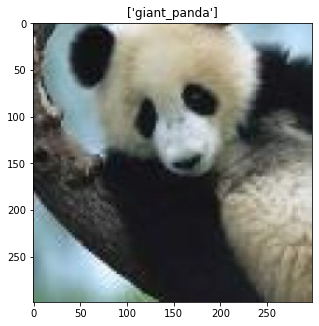

In [8]:
normal_iter = iter(normal_loader)
images, labels = normal_iter.next()

print("True Image & True Label")
imshow(torchvision.utils.make_grid(images, normalize=True), [normal_data.classes[i] for i in labels])

In [9]:
model = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT).to(device)

True Image & Predicted Label


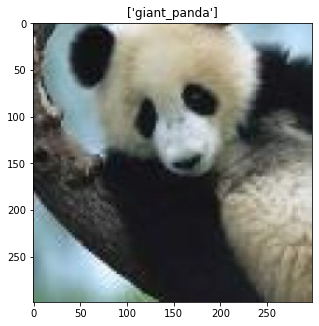

Accuracy of test text: 100.000000 %


In [10]:
print("True Image & Predicted Label")

model.eval()

correct = 0
total = 0

for images, labels in normal_loader:
    
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    
    _, pre = torch.max(outputs.data, 1)
    
    total += 1
    correct += (pre == labels).sum()
    
    imshow(torchvision.utils.make_grid(images.cpu().data, normalize=True), [normal_data.classes[i] for i in pre])
        
print('Accuracy of test text: %f %%' % (100 * float(correct) / total))

In [11]:
def pgd_attack(model, images, labels, eps=0.3, alpha=2/255, iters=40) :
    images = images.to(device)
    labels = labels.to(device)
    loss = nn.CrossEntropyLoss()
        
    ori_images = images.data
        
    for i in range(iters) :    
        images.requires_grad = True
        outputs = model(images)

        model.zero_grad()
        cost = loss(outputs, labels).to(device)
        cost.backward()

        adv_images = images + alpha*images.grad.sign()
        eta = torch.clamp(adv_images - ori_images, min=-eps, max=eps)
        images = torch.clamp(ori_images + eta, min=0, max=1).detach_()
            
    return images

Attack Image & Predicted Label


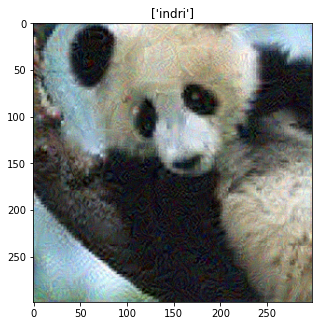

Accuracy of test text: 0.000000 %


In [12]:
print("Attack Image & Predicted Label")

model.eval()

correct = 0
total = 0

for images, labels in normal_loader:
    
    images = pgd_attack(model, images, labels)
    labels = labels.to(device)
    outputs = model(images)
    
    _, pre = torch.max(outputs.data, 1)

    total += 1
    correct += (pre == labels).sum()
    
    imshow(torchvision.utils.make_grid(images.cpu().data, normalize=True), [normal_data.classes[i] for i in pre])
    
print('Accuracy of test text: %f %%' % (100 * float(correct) / total))